## Regression Analysis
### 4.  Can we predict when California will return to normal?

In [14]:
import matplotlib.pyplot as plt
import matplotlib.pylab as plt
import pandas as pd
import numpy as np
%matplotlib inline
import requests
import time
from datetime import date
from scipy.stats import linregress

#### Clean Data

In [3]:
# Cleaning Cases Data
case_data = pd.read_csv("Data/covid19cases_test.csv")
case_data.head()

,date,area,area_type,population,cases,deaths,total_tests,positive_tests,reported_cases,reported_deaths,reported_tests
0,4/23/2021,Alameda,County,1685886.0,0.0,0.0,NaN,NaN,106.0,3.0,11251.0
1,4/23/2021,Alpine,County,1117.0,0.0,0.0,NaN,NaN,0.0,0.0,2.0
2,4/23/2021,Amador,County,38531.0,0.0,0.0,NaN,NaN,4.0,0.0,487.0
3,4/23/2021,Butte,County,217769.0,0.0,0.0,NaN,NaN,16.0,0.0,454.0
4,4/23/2021,Calaveras,County,44289.0,0.0,0.0,NaN,NaN,5.0,0.0,135.0


In [4]:
#Reformat date column, fill NaN, filter out bad rows, rename columns
case_data['date']=pd.to_datetime(case_data['date'])
case_data = case_data.fillna(0)
end_date = "2021/04/01"
#The state of CA has special restrictions for counties with populations under 100k. Filter those out.
clean_case = case_data.loc[(case_data['date']<end_date) & 
                          (case_data.area != 'Out of state') & 
                          (case_data.area != 'California')& 
                          (case_data.area != 'Unknown')&
                          (case_data.population >= 100000)] 
clean_case = clean_case[['date', 'area', 'population', 'positive_tests']]
clean_case = clean_case.rename(columns ={'date':'Date','area': 'County','population':'Population','positive_tests':'Positive Tests'} )
#Create column for cases per 100k
clean_case["Cases Per 100k"] = round(clean_case["Positive Tests"] / clean_case["Population"] * 100000,2)
clean_case.head()
clean_case.to_csv("case_data_cleaned.csv")

In [5]:
clean_case.head()

,Date,County,Population,Positive Tests,Cases Per 100k
1403,2021-03-31,Alameda,1685886.0,123.0,7.30
1406,2021-03-31,Butte,217769.0,11.0,5.05
1410,2021-03-31,Contra Costa,1160099.0,91.0,7.84
1412,2021-03-31,El Dorado,193098.0,20.0,10.36
1413,2021-03-31,Fresno,1032227.0,94.0,9.11


In [6]:
vtacounty_case=clean_case.loc[(clean_case['County'] == 'Ventura')]
vtacounty_case=vtacounty_case.sort_values(['Date'])
vtacounty_case.head()
vtacounty_case.to_csv("VTA_County.csv")

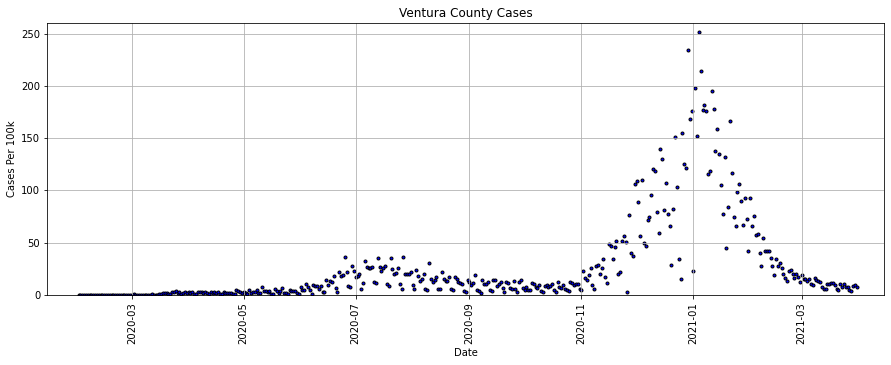

In [7]:
#Scatter Plot VTA
#plt.figure(figsize=(10,5))
plt.figure(figsize=(15,5))
plt.scatter(x=vtacounty_case["Date"],y=vtacounty_case["Cases Per 100k"], color="blue",marker='.', edgecolors="black")
plt.title("Ventura County Cases")
plt.ylim(0, 260)
plt.xlim(pd.Timestamp('1/15/2020'),pd.Timestamp('4/15/2021'))
plt.xlabel("Date")
plt.ylabel("Cases Per 100k")
plt.xticks(rotation=90)
plt.grid()

In [8]:
lacounty_case=clean_case.loc[(clean_case['County'] == 'Los Angeles')]
lacounty_case=lacounty_case.sort_values(['Date'])
lacounty_case.head()
lacounty_case.to_csv("LA_County.csv")

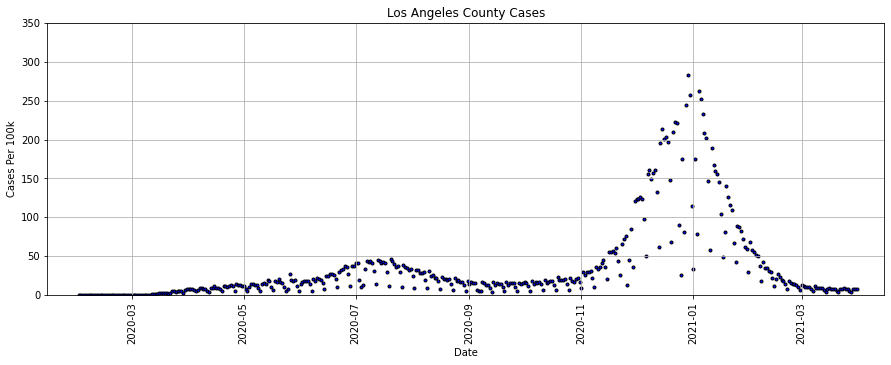

In [9]:
#Scatter Plot LA
plt.figure(figsize=(15,5))
plt.scatter(x=lacounty_case["Date"],y=lacounty_case["Cases Per 100k"], color="blue",marker='.', edgecolors="black")
plt.title("Los Angeles County Cases")
plt.ylim(0, 350)
plt.xlim(pd.Timestamp('1/15/2020'),pd.Timestamp('4/15/2021'))
plt.xlabel("Date")
plt.ylabel("Cases Per 100k")
plt.xticks(rotation=90)
plt.grid()

In [10]:
lacounty_case.dtypes


Date              datetime64[ns]
County                    object
Population               float64
Positive Tests           float64
Cases Per 100k           float64
dtype: object

In [12]:
# Add the linear regression equation and line to plot
(slope, intercept,rvalue, pvalue, stderr)= linregress(list(lacounty_case["Date"]),list(lacounty_case["Cases Per 100k"]))
regress_values=lacounty_case["Date"]* slope + intercept
line_eq= f"y = {round(slope, 2)} x + {round(intercept, 2)}"
plt.scatter(lacounty_case["Date"],lacounty_case["Cases Per 100k"],color="b",edgecolors="black")
plt.plot(lacounty_case["Date"], regress_values, color= "r")
plt.annotate(line_eq,(5,5), fontsize=14)
plt.title("Los Angeles County Cases")
plt.ylim(0, 350)
plt.xlim(pd.Timestamp('1/15/2020'),pd.Timestamp('4/15/2021'))
plt.xlabel("Date")
plt.ylabel("Cases Per 100k")
plt.xticks(rotation=90)
plt.grid()
print(f"The r value is: {rvalue}")
plt.show()

TypeError: unsupported operand type(s) for +: 'Timestamp' and 'Timestamp'